In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
conda install -c conda-forge scikit-plot

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install yfinance
!pip install investpy
!pip install pykrx
!pip install seaborn
!pip install workalendar
!pip install --upgrade finance-datareader

You should consider upgrading via the 'c:\users\song\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\song\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\song\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\song\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\song\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\song\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import talib as ta # 기술적 분석 (보조지표)
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [255]:
# 크롤링 start_date, end_date
start_date='2018-11-01'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date='2021-01-15'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')

In [256]:
# 데이터 수집기간 입력
# yahoo finance 양식, ex) yyyy-mm-dd
#start_date = '2018-01-01'
#end_date = '2020-10-13'

# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]

In [257]:
# 주요 3개국 대비 원 환율

# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# S&P 500
snp_500_ = yf.download("^GSPC", start=start_date, end=end_date)
snp_500_.columns = ['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Close','snp_500_Adj Close','snp_500_Volume']
snp_500_ = snp_500_.drop(['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Adj Close','snp_500_Volume'], axis=1)

# NASDAQ
nasdaq_ = yf.download("^IXIC", start=start_date, end=end_date)
nasdaq_.columns = ['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Close','nasdaq_Adj Close','nasdaq_Volume']
nasdaq_ = nasdaq_.drop(['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Adj Close','nasdaq_Volume'], axis=1)

# Russell 2000
russell_2000_ = yf.download("^RUT", start=start_date, end=end_date)
russell_2000_.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000_ = russell_2000_.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
model_samsung['macd'] = macd
model_samsung['macdsignal9'] = macdsignal9
model_samsung['macdhist'] = macdhist

MSCI_KR = fdr.DataReader('156080', start_date,end_date) #MSCI KOREA
MSCI_KR = MSCI_KR.drop(['Open','High','Low', 'Change','Volume'], axis=1) 
MSCI_KR.columns = ['MSCI_KR']

# HANG SENG
hang_seng_ = yf.download("^HSI", start=start_date, end=end_date)
hang_seng_.columns = ['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Close','hang_seng_Adj Close','hang_seng_Volume']
hang_seng_ = hang_seng_.drop(['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Adj Close','hang_seng_Volume'], axis=1)

# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

# 미국 국채 수익률 (10년)
treasury_10y_ = yf.download("^TNX", start=start_date, end=end_date)
treasury_10y_.columns = ['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Close','treasury_10y_Adj Close','treasury_10y_Volume']
treasury_10y_ = treasury_10y_.drop(['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Adj Close','treasury_10y_Volume'], axis=1)

# 미국 국채 수익률 (30년)
treasury_30y_ = yf.download("^TYX", start=start_date, end=end_date)
treasury_30y_.columns = ['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Close','treasury_30y_Adj Close','treasury_30y_Volume']
treasury_30y_ = treasury_30y_.drop(['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Adj Close','treasury_30y_Volume'], axis=1)

# [*에너지*]
# WTI유 시세
crude_oil_ = yf.download("CL=F", start=start_date, end=end_date)
crude_oil_.columns = ['crude_oil_Open','crude_oil_High','crude_oil_Low','crude_oil_Close','crude_oil_Adj Close','crude_oil_Volume']
crude_oil_ = crude_oil_.drop(['crude_oil_Open','crude_oil_High','crude_oil_Low','crude_oil_Adj Close','crude_oil_Volume'], axis=1)

# 브렌트유 시세
brent_crude_oil_ = yf.download("BZ=F", start=start_date, end=end_date)
brent_crude_oil_.columns = ['brent_crude_oil_Open','brent_crude_oil_High','brent_crude_oil_Low','brent_crude_oil_Close','brent_crude_oil_Adj Close','brent_crude_oil_Volume']
brent_crude_oil_ = brent_crude_oil_.drop(['brent_crude_oil_Open','brent_crude_oil_High','brent_crude_oil_Low','brent_crude_oil_Adj Close','brent_crude_oil_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [258]:
model_samsung

,Open,High,Low,Close,Volume,macd,macdsignal9,macdhist
날짜,,,,,,,,
2018-11-01,42450,42950,42150,42150,13423132,NaN,NaN,NaN
2018-11-02,43050,44250,42800,44150,16517112,NaN,NaN,NaN
2018-11-05,43750,43800,42900,43800,9426777,NaN,NaN,NaN
2018-11-06,43750,43800,42950,43750,7713625,NaN,NaN,NaN
2018-11-07,43600,44500,43400,44000,11553998,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-01-11,90000,96800,89500,91000,90306177,4877.198339,3842.490073,1034.708266
2021-01-12,90300,91400,87800,90600,48682416,5175.725651,4109.137188,1066.588463
2021-01-13,89800,91200,89100,89700,36068848,5278.837071,4343.077165,935.759906


In [259]:
#  현대차
df1 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005380")
df1 = df1.drop(['시가','고가','저가','거래량'],axis=1)
df1.columns = ['Close']
model_samsung['HYUNCAR'] = df1

# 현대모비스
df2 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "012330")
df2 = df2.drop(['시가','고가','저가','거래량'],axis=1)
df2.columns = ['Close']
model_samsung['HYUNMOBIS'] = df2

                                     
# 화신
df3 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "010690")
df3 = df3.drop(['시가','고가','저가','거래량'],axis=1)
df3.columns = ['Close']
model_samsung['HWASIN'] = df3

# 에스엘
df5 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005850")
df5 = df5.drop(['시가','고가','저가','거래량'],axis=1)
df5.columns = ['Close']
model_samsung['SL'] = df5


In [260]:
model_samsung

,Open,High,Low,Close,Volume,macd,macdsignal9,macdhist,HYUNCAR,HYUNMOBIS,HWASIN,SL
날짜,,,,,,,,,,,,
2018-11-01,42450,42950,42150,42150,13423132,NaN,NaN,NaN,108500,187500,2100,11279
2018-11-02,43050,44250,42800,44150,16517112,NaN,NaN,NaN,110000,188500,2125,11598
2018-11-05,43750,43800,42900,43800,9426777,NaN,NaN,NaN,104000,188500,2120,11239
2018-11-06,43750,43800,42950,43750,7713625,NaN,NaN,NaN,107500,195500,2130,11598
2018-11-07,43600,44500,43400,44000,11553998,NaN,NaN,NaN,107500,193000,2195,10402
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,90000,96800,89500,91000,90306177,4877.198339,3842.490073,1034.708266,267500,352500,3720,19000
2021-01-12,90300,91400,87800,90600,48682416,5175.725651,4109.137188,1066.588463,261000,332000,3640,19000
2021-01-13,89800,91200,89100,89700,36068848,5278.837071,4343.077165,935.759906,259000,339500,3850,19000


In [261]:
model_samsung['US'] = exchange_rate_usd_
model_samsung['SNP500'] = snp_500_
model_samsung['RUSSELL2000'] = russell_2000_
model_samsung['NASDAQ'] = nasdaq_
model_samsung['MSCI_KR'] = MSCI_KR
#model_samsung['SOXX'] = SOXX
#model_samsung['SMH'] = SMH
#model_samsung['SOXL'] = SOXL
#model_samsung['SOXS'] = SOXS
model_samsung['TREASURY_5Y']=treasury_5y_
model_samsung['TREASURY_10Y']=treasury_10y_
model_samsung['TREASURY_30Y']=treasury_30y_
#model_samsung['crude_oil'] = crude_oil_
#model_samsung['brent_crude_oil'] = brent_crude_oil_
model_samsung['hang_seng'] = hang_seng_

In [262]:
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거

In [263]:
model_samsung = model_samsung.drop(['Open','High','Low','Volume'],axis=1)

In [264]:
model_samsung

,Close,macd,macdsignal9,macdhist,HYUNCAR,HYUNMOBIS,HWASIN,SL,US,SNP500,RUSSELL2000,NASDAQ,MSCI_KR,TREASURY_5Y,TREASURY_10Y,TREASURY_30Y,hang_seng
날짜,,,,,,,,,,,,,,,,,
2018-12-18,38900,-1272.924915,-1062.142160,-210.782755,118000,200000,2585,15384,1127.53,2546.159912,1377.180054,6783.910156,11882,2.656,2.825,3.079,25814.250000
2018-12-19,39100,-1276.647097,-1105.043148,-171.603950,123000,205500,2605,15783,1129.71,2506.959961,1349.229980,6636.830078,11920,2.627,2.778,3.015,25865.390625
2018-12-20,38650,-1300.912089,-1144.216936,-156.695153,121500,200000,2475,16261,1122.78,2467.419922,1326.000000,6528.410156,11809,2.653,2.789,3.012,25623.529297
2018-12-21,38650,-1305.097912,-1176.393131,-128.704781,122500,195000,2400,15982,1129.04,2416.620117,1292.089966,6332.990234,11862,2.642,2.792,3.028,25753.419922
2018-12-27,38250,-1279.935164,-1227.837043,-52.098120,118500,188500,2325,15942,1120.08,2488.830078,1331.819946,6579.490234,11862,2.590,2.743,3.030,25478.880859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-08,88800,4384.500594,3583.813006,800.687588,246000,359500,3905,18800,1092.93,3824.679932,2091.659912,13201.980469,20990,0.479,1.105,1.863,27878.220703
2021-01-11,91000,4877.198339,3842.490073,1034.708266,267500,352500,3720,19000,1097.23,3799.610107,2091.010010,13036.429688,21055,0.498,1.132,1.876,27908.220703
2021-01-12,90600,5175.725651,4109.137188,1066.588463,261000,332000,3640,19000,1094.48,3801.189941,2127.959961,13072.429688,20870,0.503,1.138,1.885,28276.750000


In [265]:
## 튀는 값 제거하기 
## 4분의3 에서 4분의1지점 계산 후 iqr 계산해준 뒤
quartile_1 = model_samsung['Close'].quantile(0.25)
quartile_3 = model_samsung['Close'].quantile(0.75)
IQR = quartile_3 - quartile_1
lower_bound = quartile_1 - (0.5 * IQR)  ##원래는 1.5
upper_bound = quartile_3 + (2.0 * IQR)  ##원래는 1.5
print(quartile_1)
print(quartile_3)
print(IQR)
print(lower_bound) ## lower_bound 보다 낮거나
print(upper_bound) ## upper_bound 보다 높은 이상치는 제거된다.

45725.0
57400.0
11675.0
39887.5
80750.0


In [266]:
search_df = model_samsung[(model_samsung['Close'] < lower_bound) | (model_samsung['Close'] > upper_bound)]

In [267]:
## 최근에 종가 금액이 많이 올라버려서 최근일자가 많이 찍혀버렷다..
print(search_df['Close'])

날짜
2018-12-18    38900
2018-12-19    39100
2018-12-20    38650
2018-12-21    38650
2018-12-27    38250
2018-12-28    38700
2019-01-02    38750
2019-01-03    37600
2019-01-04    37450
2019-01-07    38750
2019-01-08    38100
2019-01-09    39600
2019-01-10    39800
2020-12-30    81000
2021-01-04    83000
2021-01-05    83900
2021-01-06    82200
2021-01-07    82900
2021-01-08    88800
2021-01-11    91000
2021-01-12    90600
2021-01-13    89700
2021-01-14    89700
Name: Close, dtype: int32


In [268]:
model_samsung = model_samsung.drop(search_df.index, axis=0)

In [269]:
model_samsung

,Close,macd,macdsignal9,macdhist,HYUNCAR,HYUNMOBIS,HWASIN,SL,US,SNP500,RUSSELL2000,NASDAQ,MSCI_KR,TREASURY_5Y,TREASURY_10Y,TREASURY_30Y,hang_seng
날짜,,,,,,,,,,,,,,,,,
2019-01-11,40500,-579.625056,-955.818385,376.193330,123000,196500,2400,16540,1118.23,2596.260010,1447.380005,6971.479980,12159,2.525,2.701,3.037,26667.269531
2019-01-14,40050,-463.937520,-857.442212,393.504692,121500,195000,2420,16380,1121.80,2582.610107,1432.810059,6905.919922,12013,2.529,2.710,3.060,26298.330078
2019-01-15,41100,-284.251417,-742.804053,458.552636,127500,202000,2410,16659,1122.85,2610.300049,1445.219971,7023.830078,12222,2.527,2.711,3.071,26830.289062
2019-01-16,41450,-112.312146,-616.705672,504.393526,128500,200000,2455,16699,1120.78,2616.100098,1454.699951,7034.689941,12354,2.547,2.731,3.077,26902.099609
2019-01-17,41950,63.564059,-480.651726,544.215785,129500,207000,2460,16779,1122.70,2635.959961,1467.250000,7084.459961,12441,2.571,2.749,3.077,26755.630859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-21,73000,2549.262043,2740.192720,-190.930676,187000,249000,3515,16000,1102.55,3694.919922,1970.329956,12742.519531,17820,0.383,0.941,1.684,26306.679688
2020-12-22,72300,2352.270424,2662.608261,-310.337836,184000,244000,3215,15500,1109.72,3687.260010,1989.880005,12807.919922,17595,0.364,0.918,1.653,26119.250000
2020-12-23,73900,2298.761089,2589.838826,-291.077738,185000,251000,3120,16000,1106.65,3690.010010,2007.099976,12771.110352,17875,0.377,0.955,1.697,26343.099609


In [270]:
# 차트 비교분석을 위한 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(model_samsung)
output = min_max_scaler.transform(model_samsung)
output = pd.DataFrame(output, columns=model_samsung.columns, index=list(model_samsung.index.values))
print(output.head())

               Close      macd  macdsignal9  macdhist   HYUNCAR  HYUNMOBIS  \
2019-01-11  0.011643  0.463940     0.340873  0.828841  0.437213   0.489130   
2019-01-14  0.000000  0.481200     0.358083  0.838026  0.425727   0.478261   
2019-01-15  0.027167  0.508007     0.378139  0.872538  0.471669   0.528986   
2019-01-16  0.036223  0.533659     0.400199  0.896860  0.479326   0.514493   
2019-01-17  0.049159  0.559898     0.424001  0.917989  0.486983   0.565217   

              HWASIN        SL        US    SNP500  RUSSELL2000    NASDAQ  \
2019-01-11  0.402390  0.689560  0.183142  0.239566     0.449062  0.018350   
2019-01-14  0.410359  0.677576  0.201984  0.230454     0.434721  0.007493   
2019-01-15  0.406375  0.698472  0.207526  0.248939     0.446936  0.027019   
2019-01-16  0.424303  0.701468  0.196601  0.252811     0.456267  0.028817   
2019-01-17  0.426295  0.707460  0.206735  0.266069     0.468620  0.037059   

             MSCI_KR  TREASURY_5Y  TREASURY_10Y  TREASURY_30Y  hang_

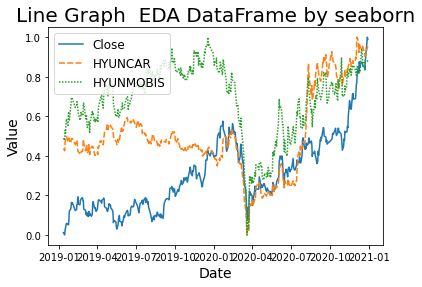

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

##삼성주가 현대자동차 현대모비스 비교
ax = sns.lineplot(data=output[['Close', 'HYUNCAR', 'HYUNMOBIS']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

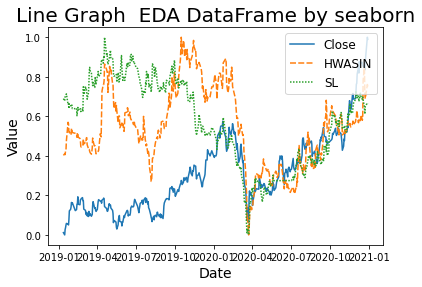

In [272]:
##삼성주가 화신, 에스엘 비교
ax = sns.lineplot(data=output[['Close', 'HWASIN', 'SL']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

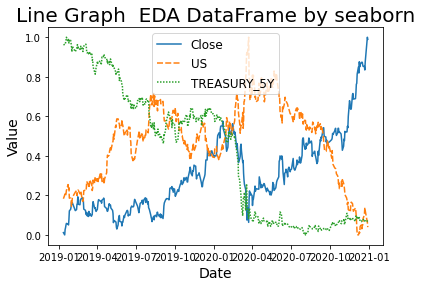

In [273]:
##삼성주가와 달러 비교 -> 달러가 오르면 삼성전자는 감소
ax = sns.lineplot(data=output[['Close', 'US','TREASURY_5Y']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

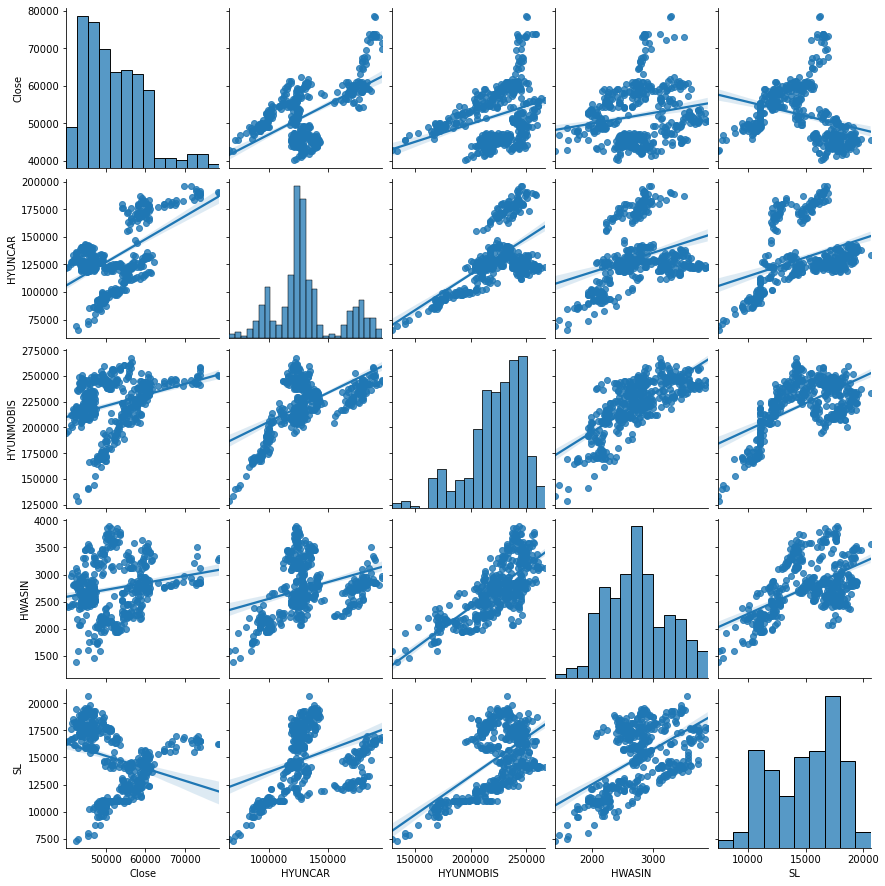

In [274]:
import seaborn as sns
#sns.pairplot(returns[1:]) ## pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도 첫번째 행은 null 값이므로 제외하고 수행
sns.pairplot(model_samsung[['Close','HYUNCAR', 'HYUNMOBIS', 'HWASIN', 'SL']], kind='reg')

In [275]:
model_samsung.drop(['macdhist','macdsignal9', 'RUSSELL2000', 'NASDAQ', 'MSCI_KR', 'TREASURY_10Y','TREASURY_30Y', 'hang_seng'],axis=1,inplace=True)

<AxesSubplot:>

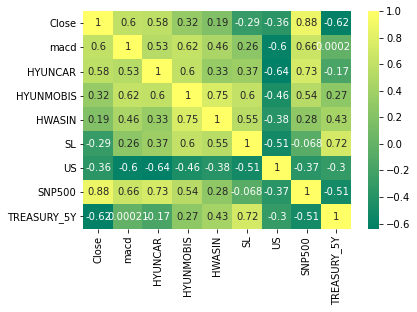

In [276]:
sns.heatmap(model_samsung.corr(), annot=True, cmap='summer')

In [277]:
## 화신, 에스엘 연관성이 적어 제거 
model_samsung.drop(['HWASIN','SL', 'macd'],axis=1,inplace=True)

In [278]:
model_samsung

,Close,HYUNCAR,HYUNMOBIS,US,SNP500,TREASURY_5Y
날짜,,,,,,
2019-01-11,40500,123000,196500,1118.23,2596.260010,2.525
2019-01-14,40050,121500,195000,1121.80,2582.610107,2.529
2019-01-15,41100,127500,202000,1122.85,2610.300049,2.527
2019-01-16,41450,128500,200000,1120.78,2616.100098,2.547
2019-01-17,41950,129500,207000,1122.70,2635.959961,2.571
...,...,...,...,...,...,...
2020-12-21,73000,187000,249000,1102.55,3694.919922,0.383
2020-12-22,72300,184000,244000,1109.72,3687.260010,0.364
2020-12-23,73900,185000,251000,1106.65,3690.010010,0.377


In [279]:
## 머신러닝

In [280]:
df_scaled = model_samsung.copy()
train_date = '2020-11-01'

train_set = df_scaled[:train_date].values

print(df_scaled.shape)
print(train_set.shape)

(452, 6)
(414, 6)


In [281]:
time_seq = 5
X_train = []
y_train = []
for i in range(time_seq, train_set.shape[0]):
    X_train.append(train_set[i-time_seq:i, 0:train_set.shape[1]-1])
    y_train.append(train_set[i, train_set.shape[1]-1:])
X_train, y_train = np.array(X_train), np.array(y_train)

In [282]:
X_train.shape 

(409, 5, 5)

In [283]:
scalers = {}
#sc2 = StandardScaler()
sc2 = MinMaxScaler()
for i in range(X_train.shape[1]):
    scalers[i] = MinMaxScaler()
    X_train[:, i, :] = scalers[i].fit_transform(X_train[:, i, :]) 
    
y_train = sc2.fit_transform(y_train)

In [284]:
print(X_train.shape)
print(y_train.shape)

(409, 5, 5)
(409, 1)


In [285]:
X_test = []
y_test = []
for i in range(train_set.shape[0], df_scaled.shape[0]):
    X_test.append(df_scaled.values[i-time_seq:i, 0:train_set.shape[1]-1])
    y_test.append(df_scaled.values[i, train_set.shape[1]-1:])
X_test, y_test = np.array(X_test), np.array(y_test)

for i in range(X_test.shape[1]):
    X_test[:, i, :] = scalers[i].transform(X_test[:, i, :]) 

y_test = sc2.transform(y_test)

In [286]:
X_test.shape

(38, 5, 5)

In [287]:

## 머신러닝 수행하기 위해 3차원 배열 2차원 배열로 reshape
X_train_resh = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

In [288]:
## 머신러닝 수행하기 위해 3차원 배열 2차원 배열로 reshape
X_test_resh = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

In [289]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    print('RMSLE: {0:.4f}'.format(rmsle))
    return rmsle

In [290]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    #if is_expm1 :
        # 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
    #    y_test = np.expm1(y_test)
        # 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
    #   pred = np.expm1(pred)
    
    model_name = model.__class__.__name__
    print('###',model_name,'###')
    #print('###',model.__class__.__name__,'###')
    rmsle(y_test, pred)
    #print('\n{0} 학습데이터셋 정확도: {1:.4f}'.format(model_name, model.score(X_train, y_train)))
    #accuracy = accuracy_score(y_test, pred)    
    #print('{0} 테스트셋 정확도: {1:.4f}'.format(model_name, accuracy))

In [291]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [292]:
# LinearRegression, 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=500)
gbm_model = GradientBoostingRegressor(n_estimators=500)
xgb_model = XGBRegressor(n_estimators=500)
lgbm_model = LGBMRegressor(n_estimators=500)

model_list = [lr_model, rf_model, gbm_model, xgb_model, lgbm_model]
for model in model_list:
    get_model_predict(model, X_train_resh, X_test_resh, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.1863


<ipython-input-290-acd6da5f05a6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


### RandomForestRegressor ###
RMSLE: 0.0319


C:\Users\song\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### GradientBoostingRegressor ###
RMSLE: 0.1161
### XGBRegressor ###
RMSLE: 0.0329
### LGBMRegressor ###
RMSLE: 0.0575


C:\Users\song\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [293]:
model = LinearRegression()
model.fit(X_train_resh, y_train)
#pred = model.predict(X_test)

LinearRegression()

In [294]:
X_test_resh[0]

array([0.90561798, 0.83484723, 0.76449275, 0.1044085 , 0.91406376,
       0.88764045, 0.88026424, 0.83695652, 0.11218819, 0.85845283,
       0.84433962, 0.88852188, 0.89492754, 0.14750556, 0.76939051,
       0.80094787, 0.85962015, 0.78985507, 0.1174364 , 0.79848006,
       0.72985782, 0.81420314, 0.69927536, 0.15713756, 0.76859399])

In [295]:
#RMSE 정밀도 구하기
X_test_ = []
y_test_ = []
for i in range(0, X_test_resh.shape[1]):
    X_test_.append(X_test_resh[i])
    y_test_.append(y_test[i])
X_test_, y_test_ = np.array(X_test_), np.array(y_test_)

predictions = model.predict(X_test_)
rmse = np.sqrt(np.mean(((predictions - y_test_) ** 2)))
rmse

0.25699118922552394